In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Läsa in, förstå och resning av data
df = pd.read_csv("SwedenHousingPrices.csv")

In [2]:
df.head()

,ad_id,date_published,typology,asking_price_sek,land_area_sqm,living_area_sqm,sqm_price_sek,number_rooms,address,location,coordenates
0,21440984,2024-12-28,APARTMENT,3695000.0,0.0,82.0,45061.0,4.0,Einar Hansens esplanad 14,"Västra Hamnen, Malmö kommun","55.6118431,12.9822884"
1,21462070,2024-12-28,APARTMENT,3095000.0,0.0,109.0,28394.0,4.0,Skarpskyttevägen 30A,"Norra Fäladen, Lunds kommun","55.7230072,13.1973028"
2,21455084,2024-12-28,APARTMENT,2295000.0,0.0,54.0,42500.0,2.0,Boplatsvägen 9,"Brotorp/järvastaden, Sundbybergs kommun","59.381943,17.973993"
3,21411619,2024-12-28,APARTMENT,3675000.0,0.0,119.0,30882.0,4.0,Drottninggatan 34C,"Alingsås, Alingsås kommun","57.93111,12.5369"
4,21461458,2024-12-28,APARTMENT,295000.0,0.0,99.0,2980.0,4.0,Valhallagatan 19A,"Skara, Skara kommun","58.38283,13.4190693"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11549 entries, 0 to 11548
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ad_id             11549 non-null  int64  
 1   date_published    11549 non-null  object 
 2   typology          11549 non-null  object 
 3   asking_price_sek  11549 non-null  float64
 4   land_area_sqm     11549 non-null  float64
 5   living_area_sqm   11549 non-null  float64
 6   sqm_price_sek     11549 non-null  float64
 7   number_rooms      11549 non-null  float64
 8   address           11547 non-null  object 
 9   location          11549 non-null  object 
 10  coordenates       11549 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 992.6+ KB


In [36]:
print(df.describe())

       asking_price_sek  land_area_sqm  living_area_sqm  number_rooms  \
count      1.154900e+04   1.154900e+04     11549.000000  11549.000000   
mean       3.116812e+06   1.251064e+04       100.223985      3.314529   
std        2.642989e+06   4.379624e+05        86.390649      1.928790   
min        2.400000e+04   0.000000e+00         0.000000      0.000000   
25%        1.595000e+06   0.000000e+00        54.500000      2.000000   
50%        2.450000e+06   0.000000e+00        78.000000      3.000000   
75%        3.850000e+06   5.200000e+02       126.000000      4.000000   
max        5.375000e+07   3.160000e+07      4650.000000     30.000000   

       year_published  month_published      latitude     longitude  \
count    11549.000000     11549.000000  11549.000000  11549.000000   
mean      2024.628106         5.293705     58.780076     15.545019   
std          0.483331         5.173821      2.003369      2.530901   
min       2024.000000         1.000000     55.342420     11.13

In [5]:
df = df.drop(columns = ["ad_id", "sqm_price_sek", "address", "location"])

In [6]:
df["date_published"] = pd.to_datetime(df["date_published"])
df["year_published"] = df["date_published"].dt.year
df["month_published"] = df["date_published"].dt.month

In [7]:
df[["latitude", "longitude"]] = df["coordenates"].str.replace('"', '').str.split(',', expand=True).astype(float)

In [9]:
print(df.columns)

Index(['date_published', 'typology', 'asking_price_sek', 'land_area_sqm',
       'living_area_sqm', 'number_rooms', 'coordenates', 'year_published',
       'month_published', 'latitude', 'longitude'],
      dtype='object')


In [10]:
df = pd.get_dummies(df, columns=['typology'])

In [11]:
typology_cols = [col for col in df.columns if col.startswith("typology_")]
df[typology_cols] = df[typology_cols].astype(int)


In [13]:
df = df.drop(columns=["coordenates", "date_published" ])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11549 entries, 0 to 11548
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   asking_price_sek                     11549 non-null  float64
 1   land_area_sqm                        11549 non-null  float64
 2   living_area_sqm                      11549 non-null  float64
 3   number_rooms                         11549 non-null  float64
 4   year_published                       11549 non-null  int32  
 5   month_published                      11549 non-null  int32  
 6   latitude                             11549 non-null  float64
 7   longitude                            11549 non-null  float64
 8   typology_AGRICULTURAL_ESTATE         11549 non-null  int64  
 9   typology_APARTMENT                   11549 non-null  int64  
 10  typology_ESTATE_WITHOUT_CULTIVATION  11549 non-null  int64  
 11  typology_FORESTING_ESTATE   

In [69]:
print(df.columns)

Index(['land_area_sqm', 'living_area_sqm', 'number_rooms', 'year_published',
       'month_published', 'latitude', 'longitude',
       'typology_AGRICULTURAL_ESTATE', 'typology_APARTMENT',
       'typology_ESTATE_WITHOUT_CULTIVATION', 'typology_FORESTING_ESTATE',
       'typology_HOMESTEAD', 'typology_HOUSE', 'typology_LINKED_HOUSE',
       'typology_OTHER', 'typology_PLOT', 'typology_ROW_HOUSE',
       'typology_TERRACED_HOUSE', 'typology_TWIN_HOUSE',
       'typology_VACATION_HOME', 'typology_VACATION_HOUSE',
       'typology_WINTERIZED_VACATION_HOME', 'target'],
      dtype='object')


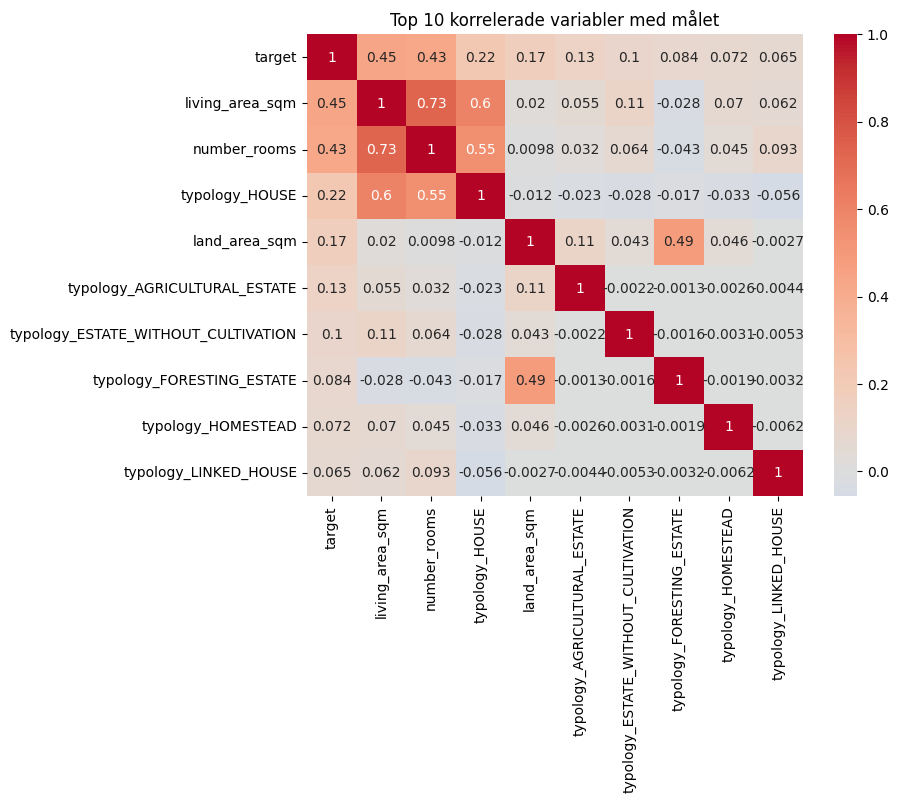

In [ ]:
target_corr = df.corr(numeric_only=True)["target"].sort_values(ascending=False)
top_features = target_corr.head(10).index

plt.figure(figsize=(8, 6))
sns.heatmap(df[top_features].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Top 10 korrelerade variabler med målet")
plt.show()

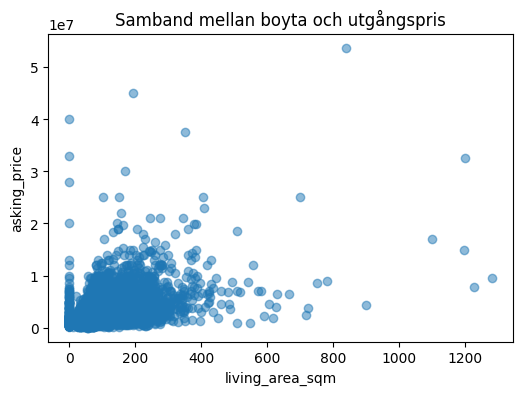

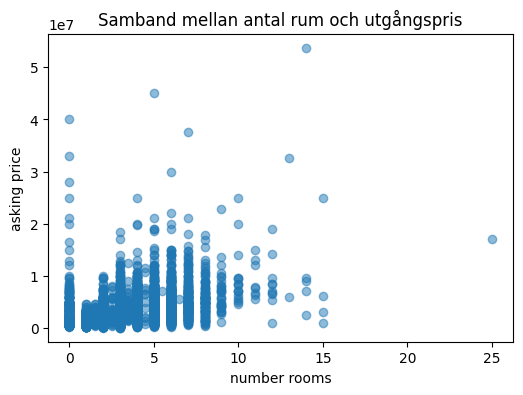

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df["living_area_sqm"], df["target"], alpha=0.5)
plt.xlabel("living_area_sqm")
plt.ylabel("asking_price")
plt.title("Samband mellan boyta och utgångspris")
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(df["number_rooms"], df["target"], alpha=0.5)
plt.xlabel("number rooms")
plt.ylabel("asking price")
plt.title("Samband mellan antal rum och utgångspris")
plt.show()


In [14]:
df.to_csv("Rensad_data.csv", index=False)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
#Modellering
y = df["asking_price_sek"]
x = df.drop(columns=["asking_price_sek"])

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBRegressor": XGBRegressor(random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
    print(f"{name} - RMSE: {-scores.mean():}")


Linear Regression - RMSE: 2320915.590743982
Random Forest - RMSE: 1796703.1219826897
Gradient Boosting - RMSE: 1919165.1286081758
XGBRegressor - RMSE: 1763080.3364710535


In [ ]:
xgb = XGBRegressor(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1, 0.2]
}

grid_search = GridSearchCV(
    xgb,
    param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train_val, y_train_val)

print("Bästa parametrar:", grid_search.best_params_)
print("Bästa CV-RMSE:", -grid_search.best_score_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Bästa parametrar: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Bästa CV-RMSE: 1662990.9491677538


In [ ]:
y_train_val_log = np.log(y_train_val)

xgb_log = XGBRegressor(learning_rate=0.2, max_depth=5, n_estimators=200, random_state=42)

xgb_log.fit(x_train_val, y_train_val_log)

y_val_pred_log = xgb_log.predict(x_val)

y_val_pred = np.exp(y_val_pred_log)

rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("RMSE XGB log:", rmse_val)

RMSE XGB log: 978219.459161951


In [25]:
y_test_log_pred = xgb_log.predict(x_test)
y_test_pred = np.exp(y_test_log_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Slutlig RMSE på testset:", rmse_test)


Slutlig RMSE på testset: 1381053.0650863657


In [ ]:
import joblib

model_package = {
    "model": xgb_log, 
    "columns": list(x_train_val.columns)
}

joblib.dump(model_package, "xgb_log_model.pkl")
print("Modellen sparad!")


Modellen sparad!
